# Plotting

<br/>
<div class="alert alert-block alert-warning" style="padding:1em">Almost all core objects in tracklib have a graphical function for displaying data: <b>plot</b>.</div>

There are different ways of displaying analytical tracks, as shown below. 

You can create a set of plot in a same graphic with the *append* parameter: if the value is
- True : append to the current plot
- False: create a new plot
- Ax   : append to the fiven *ax* object


## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imports

The following imports are necessary for all of the examples.

In [2]:
import matplotlib.pyplot as plt

import tracklib as tkl

code running in a no qgis environment
Code running in a no qgis environment


## Loading a GPS track for examples

In [3]:
tkl.ObsTime.setReadFormat("4Y-2M-2DT2h:2m:2sZ")

tracks = tkl.TrackReader.readFromGpx('../../../data/gpx/activity_5807084803.gpx')
trace = tracks.getTrack(0)

# Transformation GEO coordinates to ENU
trace.toENUCoords()

# 
trace.resample(50, tkl.MODE_SPATIAL)

## Classics graphics

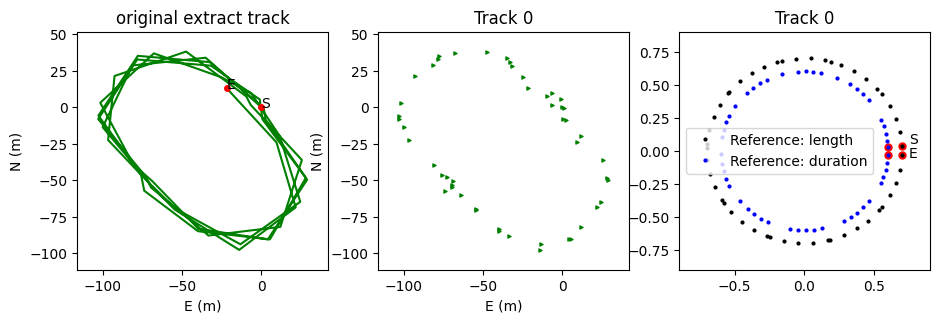

In [4]:
plt.figure(figsize=(11, 2))
plt.subplots_adjust(top=1.3, wspace=0.2, hspace=0.5)

# ---------------------------------------------------------------------
# 
ax1 = plt.subplot2grid((1, 3), (0, 0))
#trace.plot(type='LINE', append=ax1)
trace.plot(sym='g-', title='original extract track', append=ax1)

# plot first obs, plot last obs
trace.plotFirstObs(append=ax1)
trace.plotLastObs(append=ax1)

# ---------------------------------------------------------------------
# 
ax2 = plt.subplot2grid((1, 3), (0, 1))
trace.plot(type='POINT', sym='g>', append=ax2)
# ax22.scatter(trace.getX(), trace.getY(), marker='o', c='#C0C0C0', s=5)

# ---------------------------------------------------------------------
#
ax3 = plt.subplot2grid((1, 3), (0, 2))
trace.plot(type='CIRCULAR', append=ax3)

plt.show()

## Plot a track with markers

<module 'matplotlib.pyplot' from '/home/marie-dominique/.pyenv/versions/3.9.1/lib/python3.9/site-packages/matplotlib/pyplot.py'>

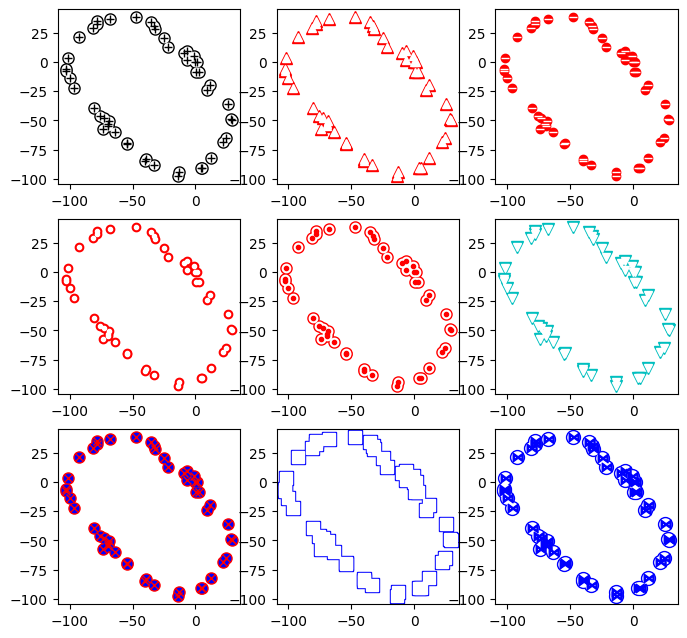

In [5]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=1.3, wspace=0.2, hspace=0.2)

# Figure 1
ax1 = plt.subplot2grid((3, 3), (0, 0))
trace.plotAsMarkers()

# Figure 2
ax2 = plt.subplot2grid((3, 3), (0, 1))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_WARNING, append=ax2)

# Figure 3
ax3 = plt.subplot2grid((3, 3), (0, 2))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_NO_ENTRY, append=ax3)

# Figure 4
ax4 = plt.subplot2grid((3, 3), (1, 0))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_INTERDICTION, append=ax4)

# Figure 5
ax5 = plt.subplot2grid((3, 3), (1, 1))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_SPOT, append=ax5)

# Figure 6
ax6 = plt.subplot2grid((3, 3), (1, 2))
trace.plotAsMarkers(bkg='w', frg='c', sym_frg = " ", sym_bkg = "v", append=ax6)

# Figure 7
ax7 = plt.subplot2grid((3, 3), (2, 0))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_NO_STOP, size=8, append=ax7)

# Figure 8
ax8 = plt.subplot2grid((3, 3), (2, 1))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_INFORMATION, size=10, append=ax8)

# Figure 9
ax9 = plt.subplot2grid((3, 3), (2, 2))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_BOWTIE, size=10, append=ax9)

## Dessiner les traces avec prise en compte d'une AF

In [6]:
trace.estimate_speed()
print ('All AF: ', trace.getListAnalyticalFeatures())
print ('Speed for the first observation: ', trace['speed'][0])

All AF:  ['abs_curv', 'speed']
Speed for the first observation:  5.533338627821578


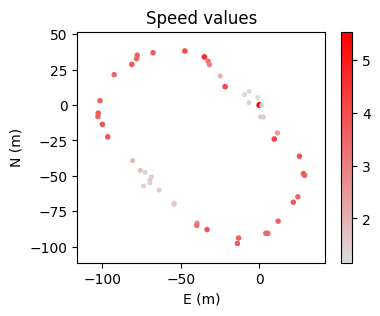

In [7]:
# -----------------------------------------------------------------------
# Type RASTER

COLS = tkl.getColorMap((220, 220, 220), (255, 0, 0))
trace.plot(type='POINT', af_name='speed', append = False, cmap = COLS, title='Speed values', w=4, h=3)

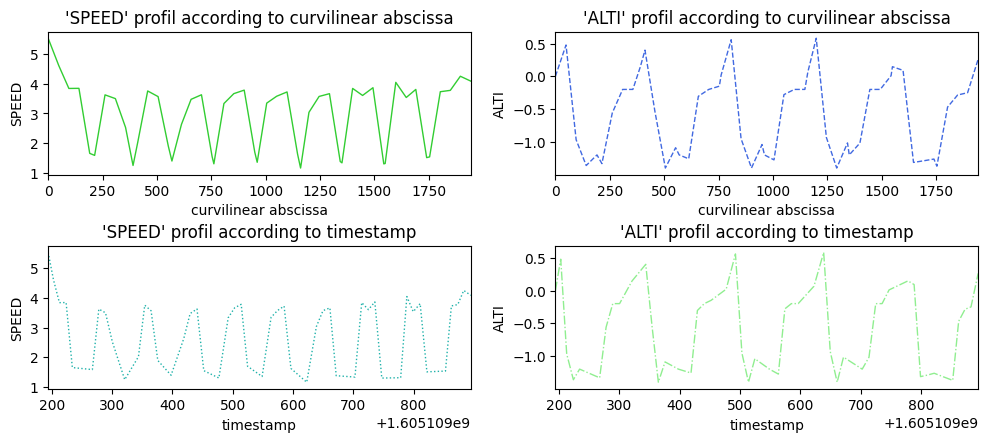

In [8]:
# -----------------------------------------------------------------------------------------------------
#       PROFIL
# -----------------------------------------------------------------------------------------------------

#  Sample
plt.figure(figsize=(12, 3))
plt.subplots_adjust(top=1.3, wspace=0.2, hspace=0.5)

trace.plotProfil('SPATIAL_SPEED_PROFIL',  color="limegreen",     linestyle='-',  append=plt.subplot2grid((2, 2), (0, 0)))
trace.plotProfil('SPATIAL_ALTI_PROFIL',   color="royalblue",     linestyle='--', append=plt.subplot2grid((2, 2), (0, 1)))
trace.plotProfil('TEMPORAL_SPEED_PROFIL', color="lightseagreen", linestyle=':',  append=plt.subplot2grid((2, 2), (1, 0)))
trace.plotProfil('TEMPORAL_ALTI_PROFIL',  color="lightgreen",    linestyle='-.', append=plt.subplot2grid((2, 2), (1, 1)))



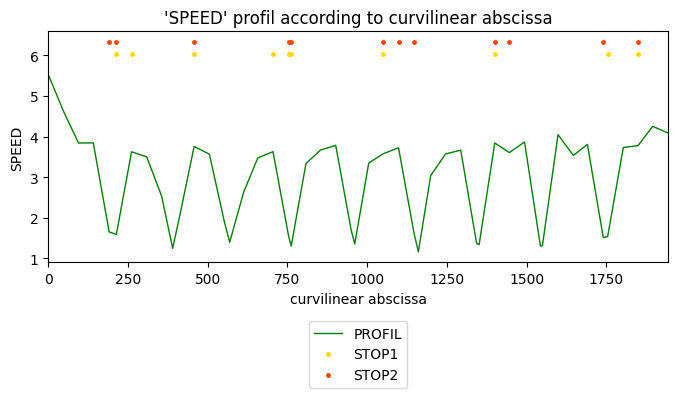

In [9]:
# With AF

# create two virtual transition AFs to visualize them
stops = [0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0]
trace.createAnalyticalFeature('STOP1', stops)
stops = [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0]
trace.createAnalyticalFeature('STOP2', stops)

TAB_AFS = ['STOP1', 'STOP2']
trace.plotProfil('SPATIAL_SPEED_PROFIL', TAB_AFS, append=False)

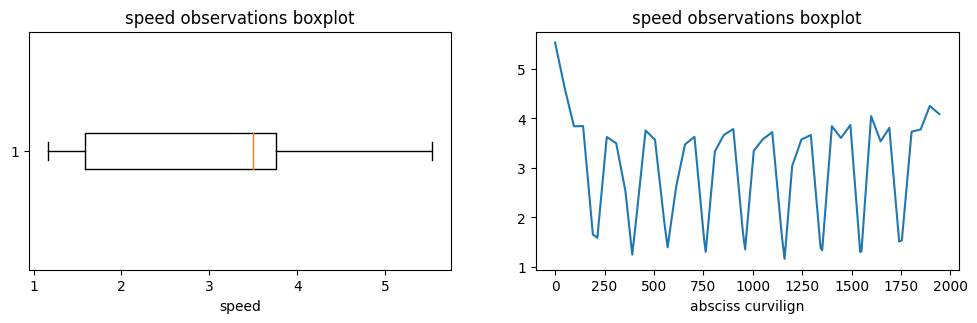

In [10]:
plt.figure(figsize=(12, 2))
plt.subplots_adjust(top=1.3, wspace=0.2, hspace=0.2)

# -----------------------------------------------------------------------
# Boxplot
ax1 = plt.subplot2grid((1, 2), (0, 0))
trace.plotAnalyticalFeature('speed', 'BOXPLOT', append=ax1)

# Graphic values in Plot
ax2 = plt.subplot2grid((1, 2), (0, 1))
trace.plotAnalyticalFeature("speed", "PLOT", append=ax2)

## Résumé

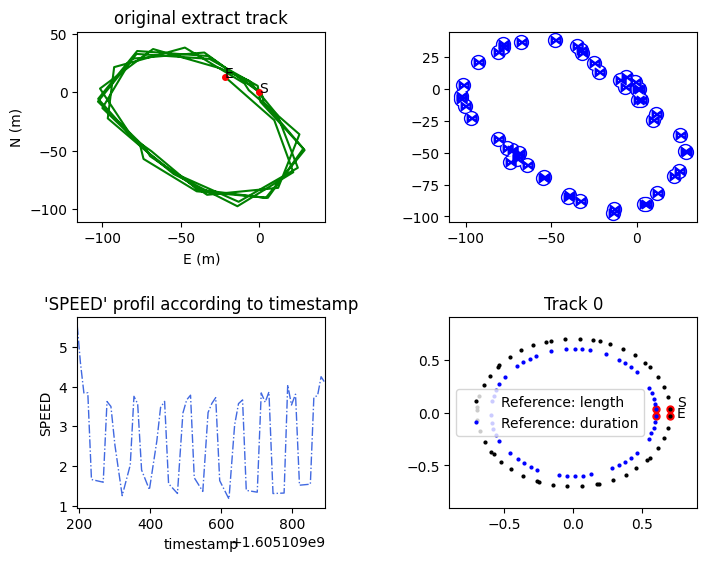

In [11]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(top=1.3, wspace=0.5, hspace=0.5)

# Figure 1
ax1 = plt.subplot2grid((2, 2), (0, 0))
trace.plot(sym='g-', title='original extract track', append=ax1)
trace.plotFirstObs(append=ax1)
trace.plotLastObs(append=ax1)

# Figure 2
ax2 = plt.subplot2grid((2, 2), (0, 1))
trace.plotAsMarkers(type=tkl.MARKERS_TYPE_BOWTIE, size=10, append=ax2)

# Figure 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
trace.plotProfil('TEMPORAL_SPEED_PROFIL',  color="royalblue",    linestyle='-.', append=ax3)

# Figure 4
ax4 = plt.subplot2grid((2, 2), (1, 1))
trace.plot(type='CIRCULAR', append=ax4)